<a href="https://colab.research.google.com/github/Robert-Gomez-AI/HeartFailure/blob/main/Entrega%20Final%20Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://drive.google.com/uc?export=view&id=1ljiY7gV0TKs3nnTMPA5UBdED8KGzzZnX" alt = "Encabezado MLDS" width = "100%">  </img>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import scipy
import statsmodels.api as sm
import folium
import statsmodels.formula.api as smf
import plotly.express as px

import os


!ls

sample_data


# **0. Entendimiento del negocio**
---
Este notebook es una plantilla que le puede servir como guía para el primer entregable del proyecto aplicado.

## **0.1 Integrantes del equipo de trabajo**
---

Por favor incluya los nombres completos y número de identificación de los integrantes del equipo de trabajo:

1. John Robert Gomez Pachón
2. Yojhan Leandro Roldan Robles
3. Daniela Mejia Castro

## **0.2 Marco de Proyecto**
---

Normalmente, se suele construir un marco de proyecto para mostrar los resultados del entendimiento del negocio, es decir, debemos dar respuesta a los siguientes elementos:

# **1. Entendimiento del negocio**
---
## **1.1 Trasfondo del proyecto**
---
- ¿Quienes son los beneficiarios del proyecto? ¿En qué dominio se encuentran (marketing, medicina, entre otros)?
- ¿Cuáles son los principales desafíos o problemas de la situación que motivan la necesidad de realizar un proyecto de análisis de datos?
---

El desarrollo del proyecto se encuentra en el marco del área de la salud, más específicamente se enfoca en el análisis de datos bioestadísticos. Este es un campo que, como se describe en el articulo Chicco y Jurman (en el que se analiza el mismo set de datos), intenta encontrar correlaciones y patrones en los datos que no son fácilmente detectables por los especialistas de la salud, paso seguido construyen modelos predictivos para determinar el posible estado de los pacientes basándose en sus características.

El enfoque del proyecto se inclina por la búsqueda de relaciones entre las diferentes variables que componen la historia clínica electrónica (EHR por sus siglas en ingles). Lo anterior se fundamenta en las herramientas y metodologías del análisis y visualización de datos, particularmente se implementará en la metodología CRISP-DM.

Los beneficios son fundamentalmente:

- Poder reducir los factores de riesgo en la población en general para reducir el riesgo de fallo cardiaco y realizar tratamientos preventivos.
- Realizar un proceso de priorización para los pacientes para poder reducir sus indices de mortalidad.


El desafió al que este proyecto se enfrenta esta bien descrito en el articulo que presenta los datos, y es encontrar la manera de generar diagnostico precisos acerca de pacientes con fallas cardíacas, ya que al rededor del mundo se presentan cerca de 17 millones de muertes al año relacionadas con enfermedades cardiovasculares. Este reto ha sido tratado desde diferentes perspectivas, pero las herramientas de machine learning y bioestadistica han presentado deficiencias en generar modelos predictivos de alta precisión (comentado en el articulo).

## **1.2 Alcance**
---

- ¿Qué  solución se desea implementar?
- ¿Cuáles son los límites y fronteras del proyecto de análisis de datos? ¿Qué aspectos específicos del negocio se incluirán y cuáles se excluyen en el alcance del proyecto?
- ¿De qué forma el cliente o beneficiario utilizará el producto del proyecto?
---
Nuestra proyección se enfoca en realizar un análisis exploratorio, además de un análisis de correlación y una visualización correspondiente, la idea es poder procesar los datos y encontrar los patrones y correlaciones entre las variables y el fallo cardiaco.

En cuanto a las limitaciones debemos tener en cuenta tanto limitaciones propias, como las limitaciones presentadas en el articulo:

>1. En el articulo se menciona que los modelos creados anteriormente tienen un problema de reproducibilidad en el entorno, y tiene como resultado un disenso en cuanto a los factores que son considerados causa de muerte en fallos cardiacos. Adicionalmente, el intento por mejorar la reproducibilidad de los modelos y los analisis impactan fuertemente su rendimiento, ya que se tiende a validar la eficacia de los modelos probandolos con diferentes datasets, lo cual concluye en una baja taza de presición del modelo. La solución que propone el articulo es reproducir el modelo en entornos altamente delimitados y precisos, es por ello que este dataset es tan pequeño y preciso (299 pacientes entre 45 y 95 años con fallas cardiacas, los datos fueron recolectados en 2015 en tan solo 2 centros de salud de Pakistan), con ello las conclusiones SOLO aplicarían a la predicción de pacientes de una población muy similar. No podemos combinar datos de mas pacientes a menos que sean de una población similar, sino no tendremos consenso sobre las conclusiones.
2. El set de datos como lo conseguimos esta muy bien depurado y limpio, no presenta valores nulos, todos pertenecen a la misma población, esto nos deja una limitante en el proyecto y es que una de las fases se refiere a la PREPARACIÓN DE LOS DATOS, por lo que esta fase parece que no la podremos aplicar muy bien.
3. El proyecto es de análisis y visualización de datos, y como ya se mencionó anteriormente, NO vamos a implementar ninguna herramienta de machine learning, por lo que nuestra metodología esta resagada al avance que ya existe en el paper.

## **1.3 Plan**
---
1. Definición del conjunto de datos

- Identificar el conjunto de datos que se utilizará en el proyecto.
- Obtener información sobre el origen, la estructura y las características del conjunto de datos.
- Evaluar la calidad de los datos y determinar si se requiere algún tipo de limpieza o transformación.

2. Entendimiento del negocio

- Realizar un análisis del sector al que pertenece el conjunto de datos.
- Evaluar la situación actual del negocio y los objetivos que se persiguen.
- Definir los objetivos del proyecto de minería de datos en relación con los objetivos del negocio.
- Elaborar un plan de proyecto que detalle las actividades, los recursos y el cronograma del proyecto.
3. Entendimiento de los datos

- Capturar los datos del conjunto de datos seleccionado.
- Describir las características del conjunto de datos, incluyendo la distribución de las variables, la presencia de valores atípicos y la existencia de relaciones entre las variables.
- Gestionar la calidad de los datos mediante la identificación y corrección de errores, la eliminación de valores atípicos y la transformación de variables.
4. Análisis de los datos

- Seleccionar las técnicas de minería de datos más adecuadas para el proyecto.
- Aplicar las técnicas de minería de datos al conjunto de datos para obtener información valiosa.
- Interpretar los resultados del análisis y traducirlos en conocimiento útil para el negocio.
5. Comunicación de resultados

- Generar un informe que documente los resultados del proyecto.
- Presentar los resultados del proyecto a las partes interesadas.

**Información extra**

Enlace al gantt: https://github.com/users/danielamejiacastro/projects/1

# **2. Datos**
---

## **2.1 Origen**
Fuente: Registros médicos del Instituto de Cardiología Faisalabad y el Hospital Allied en Pakistán.

Periodo: Abril-Diciembre 2015.

Pacientes: 299 (105 mujeres, 194 hombres), edades entre 40 y 95 años.

Diagnóstico: Todos con disfunción sistólica del ventrículo izquierdo e insuficiencia cardíaca previa (NYHA III o IV).

Información: 13 características clínicas, corporales y de estilo de vida (Tabla 1). Algunas binarias (anemia, presión arterial alta, diabetes, sexo, tabaquismo).

Características:

   - Enzimas: CPK (daño muscular), EF (eficiencia cardíaca).
   - Función renal: creatinina sérica.
   - Electrolitos: sodio sérico.
   - Otros: edad, peso, altura, hemoglobina, sexo, presión arterial, diabetes, tabaquismo, anemia.

Variable objetivo: Evento de muerte (sí/no) dentro de 130 días promedio de seguimiento.
Desbalance: 67.89% sobrevivientes, 32.11% fallecidos.
Formato: Tabla con 299 filas (pacientes) y 13 columnas (características).

Limitaciones:

   - Definición de "presión arterial alta" desconocida.
   - Desconocimiento de enfermedad renal primaria o tipo de seguimiento.
   - Posibles errores en el resumen (se recomienda consultar el artículo original).

## Tabla 1: Características del conjunto de datos sobre pacientes con insuficiencia cardíaca

| Característica | Descripción | Tipo |
|---|---|---|
| Edad | Edad del paciente en años | Numérica |
| Sexo | Sexo del paciente (hombre/mujer) | Binaria |
| Peso | Peso del paciente en kilogramos | Numérica |
| Altura | Altura del paciente en metros | Numérica |
| Hemoglobina | Nivel de hemoglobina en la sangre (g/dL) | Numérica |
| Presión arterial | Presión arterial sistólica/diastólica (mmHg) | Numérica |
| Diabetes | ¿Tiene diabetes el paciente? (sí/no) | Binaria |
| Tabaquismo | ¿Fuma el paciente? (sí/no) | Binaria |
| Anemia | ¿Tiene anemia el paciente? (sí/no) | Binaria |
| CPK | Nivel de la enzima CPK en la sangre (U/L) | Numérica |
| EF | Eficiencia cardíaca (%) | Numérica |
| Creatinina sérica | Nivel de creatinina en la sangre (mg/dL) | Numérica |
| Sodio sérico | Nivel de sodio en la sangre (mEq/L) | Numérica |
| Evento de muerte | ¿El paciente murió durante el seguimiento? (sí/no) | Binaria |


## **2.2 Carga de datos**
---
Proporcione únicamente el código de Python necesario para descargar el conjunto de datos que será utilizado en el proyecto. Si es necesario, realice operaciones de adquisición e integración del conjunto de datos.

In [2]:
#Lectura de los datos en Github
#df=pd.read_csv('heart_failure_clinical_records_dataset.csv')
#Lectura de los datos desde repositorio local
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

## **2.3 Análisis Exploratorio de los Datos**
---

En esta fase, nos dedicamos a explorar y analizar detalladamente nuestro conjunto de datos con el objetivo de resumir sus características fundamentales. Nuestra meta es descubrir patrones, identificar anomalías y comprender comportamientos que puedan proporcionar insights valiosos. Este análisis exploratorio nos permite establecer, evaluar y verificar hipótesis, proporcionando una base sólida para la interpretación y toma de decisiones fundamentadas en los datos.

###Primer acercamiento a los datos
df.sample(5)

In [3]:
#Dimensiones
print(f'El set de datos contiene {df.shape[0]} registros con {df.shape[1]} variables.\nEl conjunto contiene un total de {df.size} datos.\n')
tamaño_archivo=os.path.getsize('heart_failure_clinical_records_dataset.csv')/ (1024 ** 2)
print(f'El archivo cargado pesa un total de {tamaño_archivo} MB.\nEl espacio en memoria del dataframe es de {df.memory_usage().sum()/(1024**2)} MB')

El set de datos contiene 299 registros con 13 variables.
El conjunto contiene un total de 3887 datos.

El archivo cargado pesa un total de 0.011672019958496094 MB.
El espacio en memoria del dataframe es de 0.02977752685546875 MB


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


##**2.4 Tipos de variables**

En el conjunto de datos que vamos estamos analizando, se incluyen diversas variables que caracterizan a 299 pacientes que han experimentado un fallo cardiaco. Estas variables abarcan tanto tipos discretos como continuos, y la intención es comprender el comportamiento de los pacientes afectados. El objetivo principal es estudiar la dinámica de los datos con el fin de prever posibles patrones que indiquen la probabilidad de reincidencia en casos de fallo cardiaco.

In [5]:
def identificar_dtypes(df):
  '''
  Esta función detecta las variables consideradas como categoricas y cuantitativas en este set especifico
  La función retorna dos listas, cada una agrupando las variables del dataframe
  La función solo identifica las variables categoricas para este tipo de dataset en el cual solo tienen dos valores: [0,1]
  '''
  variables_categoricas=[]
  variables_cuantitativas=[]
  for col in df.columns:
    if set(df[col].unique())==set([0,1]):
      variables_categoricas.append(col)
    elif pd.api.types.is_numeric_dtype(df[col]):
      variables_cuantitativas.append(col)
    else:
      print(f'La variable {col} no ha sido identificada')
  return variables_categoricas,variables_cuantitativas

In [6]:
variables_categoricas,variables_cuantitativas=identificar_dtypes(df)
print(f'Variables categoricas: {variables_categoricas}.\n\nVariables cuantitativas: {variables_cuantitativas}')

Variables categoricas: ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT'].

Variables cuantitativas: ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


#### **Tabla 1: Características del conjunto de datos sobre pacientes con insuficiencia cardíaca**

La tabla presenta las distintas características del conjunto de datos que se enfoca en pacientes que han experimentado insuficiencia cardíaca. Dichas características incluyen información demográfica como la edad y el sexo, así como medidas médicas como el peso, la altura, la presión arterial, niveles de hemoglobina, entre otros. Las variables se clasifican en numéricas y binarias:

| Característica | Descripción | Tipo |
|---|---|---|
| Edad | Edad del paciente en años | Numérica |
| Sexo | Sexo del paciente (hombre/mujer) | Binaria |
| Peso | Peso del paciente en kilogramos | Numérica |
| Altura | Altura del paciente en metros | Numérica |
| Hemoglobina | Nivel de hemoglobina en la sangre (g/dL) | Numérica |
| Presión arterial | Presión arterial sistólica/diastólica (mmHg) | Numérica |
| Diabetes | ¿Tiene diabetes el paciente? (sí/no) | Binaria |
| Tabaquismo | ¿Fuma el paciente? (sí/no) | Binaria |
| Anemia | ¿Tiene anemia el paciente? (sí/no) | Binaria |
| CPK | Nivel de la enzima CPK en la sangre (U/L) | Numérica |
| EF | Eficiencia cardíaca (%) | Numérica |
| Creatinina sérica | Nivel de creatinina en la sangre (mg/dL) | Numérica |
| Sodio sérico | Nivel de sodio en la sangre (mEq/L) | Numérica |
| Evento de muerte | ¿El paciente murió durante el seguimiento? (sí/no) | Binaria |


## **2.5 Resumen General**
---

- ¿Cuántos registros contiene el *dataset*?

Nuestro conjunto de datos alberga un total de 299 registros, distribuidos entre 105 correspondientes a mujeres y 194 a hombres, abarcando edades desde los 40 hasta los 95 años.

- ¿En qué formato están guardados los datos?

Los datos se encuentran almacenados en formato (.csv), que representa Valores Separados por Comas en inglés. Estos archivos, de aparente simplicidad pero con gran potencial, son una herramienta fundamental en el ámbito de la informática y la gestión de datos. Este formato destaca por su universalidad, simplicidad, portabilidad, facilidad de intercambio y eficiencia en el almacenamiento, entre otras ventajas.

- ¿Qué tamaño en MB tiene el conjunto de datos?

El tamaño del conjunto de datos es de 11.9 KB (12,239 bytes), equivalente a 0.012239 MB.

## **2.6 Análisis estadístico descriptivo**
---

Describa el conjunto de datos por medio de estadística descriptiva, aportando interpretaciones precisas que ayuden a entender los datos.

###**2.6.1 Medidas de posición (tendencia central y cuantiles)**

In [7]:
#Medidas de tendencia central: Mediana
df[variables_cuantitativas].median()

age                             60.0
creatinine_phosphokinase       250.0
ejection_fraction               38.0
platelets                   262000.0
serum_creatinine                 1.1
serum_sodium                   137.0
time                           115.0
dtype: float64

In [8]:
#Medidas de tendencia central: Moda
df.mode()
#Encontramos que para la variable time tenemos 2 modas: 187 y 250

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,60.0,0.0,582.0,0.0,35.0,0.0,263358.03,1.0,136.0,1.0,0.0,187,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250,NaN


In [9]:
#Medidas de tendencia central: Media, desviación estandar
#Medidas de posición: Cuantiles
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


###**2.6.2 Graficos de caja o boxplots**

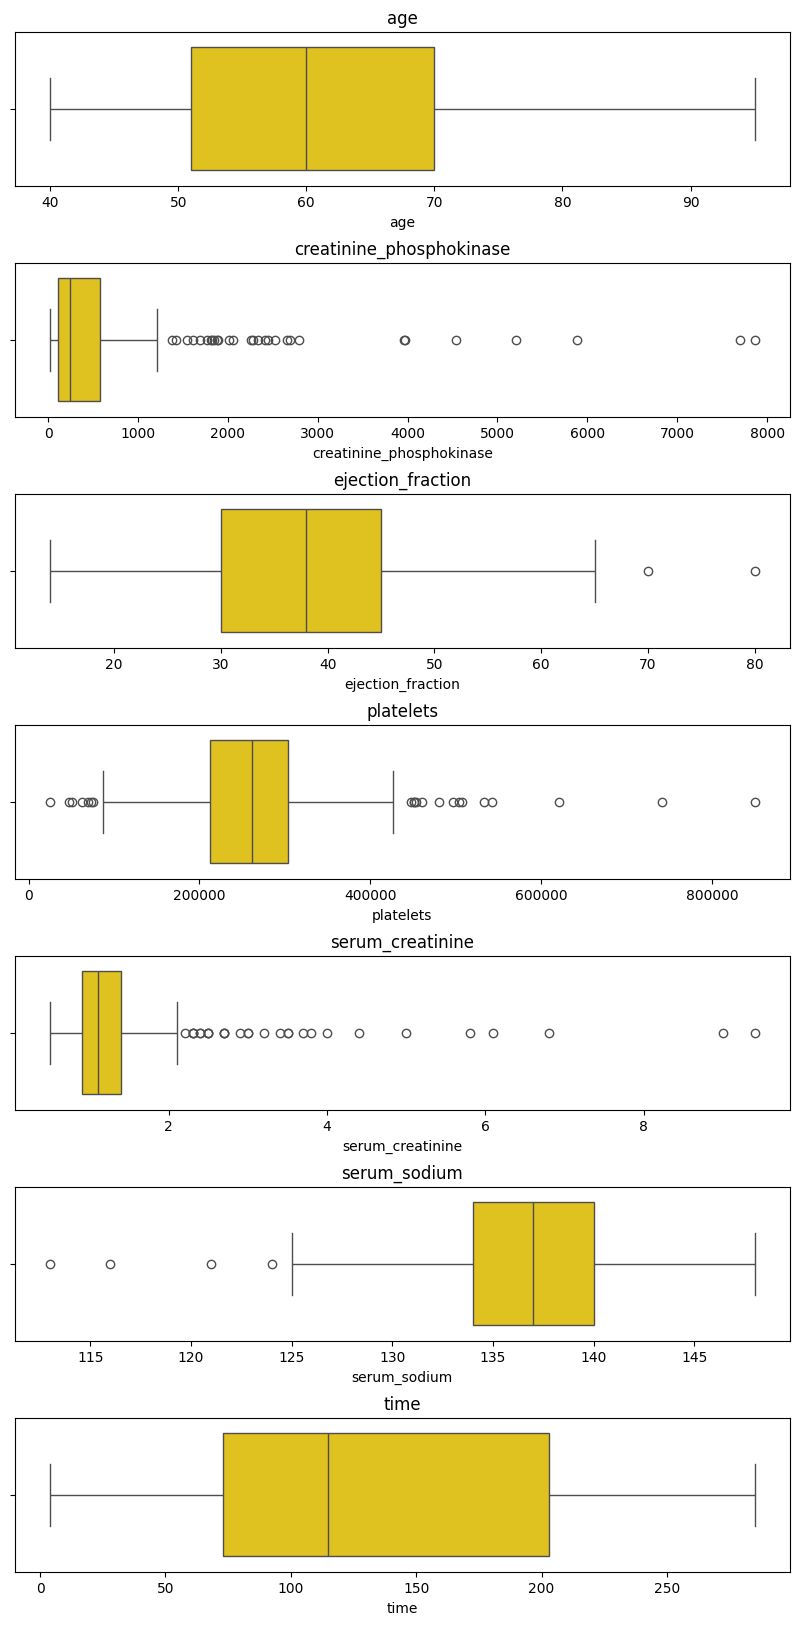

In [10]:
#Boxplots para identificar outliers
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(10,20))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(variables_cuantitativas):
    sns.boxplot(x=col, data=df, ax=ax[i],color='gold')
    ax[i].set_title(col)

**Variable: Edad (age)**

En este diagrama de bigotes, observamos que la mediana de la edad está alrededor de 60 años, el rango intercuartílico (IQR) abarca desde aproximadamente 51 a 70 años, y no hay valores atípicos evidentes.

**Variable: Nivel de Creatinina Fosfoquinasa (creatinine_phosphokinase)**

En este caso, vemos que el nivel de creatinina fosfoquinasa tiende a tener valores más bajos en su mayor parte, pero hay algunos puntos que podrían considerarse valores atípicos, ya que se encuentran fuera de los bigotes.

**Variable: Plaquetas (platelets)**

En el diagrama de bigotes de la variable "Plaquetas", se observa que la mediana está alrededor de 262,000 unidades. El rango intercuartílico (IQR) sugiere que la mayoría de los datos se concentran entre 212,500 y 303,500 unidades, con algunos valores atípicos por encima de este rango superior.

**Variable: Nivel de Creatinina en Suero (serum_creatinine)**

El diagrama de bigotes para la creatinina en suero muestra que la mediana está cerca de 1.1 mg/dL, con un IQR que se extiende desde aproximadamente 0.9 hasta 1.4 mg/dL. Se identifican algunos valores atípicos por encima de este rango superior.

**Variable: Nivel de Sodio en Suero (serum_sodium)**

El diagrama de bigotes para el sodio en suero indica que la mediana se encuentra alrededor de 137 mEq/L, con un IQR que va desde aproximadamente 134 hasta 140 mEq/L. No hay valores atípicos evidentes en este caso.

**Variable: Período de Seguimiento (time)**

Para la variable "Período de Seguimiento", el diagrama de bigotes muestra una mediana cercana a 115 días y un IQR que se extiende desde aproximadamente 73 hasta 203 días. No se identifican valores atípicos en este rango.

**Variable: Evento de Fallecimiento (DEATH_EVENT)**

En el diagrama de bigotes de la variable "Evento de Fallecimiento", se observa que la mediana es 0 (sin evento de fallecimiento) y que la mayoría de los datos se concentran en 0, con algunos valores atípicos representando eventos de fallecimiento (1).

###**2.6.3 Medidas de forma**

In [ ]:
#Medidas de forma: Kurtosis
df[variables_cuantitativas].kurt()

Los resultados de las medidas de forma, conocidas como kurtosis, ofrecen insights sobre la configuración de las distribuciones de las variables. A continuación, presentamos un análisis preliminar de la kurtosis para cada una de nuestras variables:

**Kurtosis Variable Edad (age):** La kurtosis es -0.18, lo que sugiere una distribución relativamente cercana a una distribución normal. La cola de la distribución de edades no es muy pesada.

**Kurtosis Variable Creatinina Fosfoquinasa (creatinine_phosphokinase):** La kurtosis es 25.15, indicando una distribución con colas pesadas. Esto podría sugerir la presencia de valores extremadamente altos en la variable.

**Kurtosis VariableEficiencia de Eyección (ejection_fraction):** La kurtosis es 0.04, lo que sugiere una distribución bastante normal. La variable no tiene colas pesadas.

**Kurtosis Variable Plaquetas (platelets):** La kurtosis es 6.21, indicando colas pesadas en la distribución de plaquetas. Esto puede sugerir la presencia de valores atípicos extremadamente altos.

**Kurtosis Variable Creatinina en Suero (serum_creatinine):** La kurtosis es 25.83, lo que sugiere colas pesadas en la distribución de la creatinina en suero. Esto podría indicar la presencia de valores extremadamente altos.

**Kurtosis Variable Sodio en Suero (serum_sodium):** La kurtosis es 4.12, indicando colas pesadas en la distribución de sodio en suero. Puede haber valores extremadamente altos o bajos en la variable.

**Kurtosis Variable Período de Seguimiento (time):** La kurtosis es -1.21, sugiriendo una distribución relativamente plana o con colas ligeras. La variable podría tener menos presencia de valores extremadamente altos o bajos.

In [ ]:
#Medidas de forma: Asimetria
df[variables_cuantitativas].skew()

**Asimetria Variable Edad (age)**: La asimetría es positiva (0.42), sugiriendo una cola derecha en la distribución de edades. Esto indica que hay más datos en el lado izquierdo de la media y algunos valores más altos que la media.

**Asimetria Variable Creatinina Fosfoquinasa (creatinine_phosphokinase)**: La asimetría es positiva (4.46), indicando una cola derecha pronunciada. Esto sugiere que la mayoría de los valores están en el lado izquierdo de la media, pero hay algunos valores extremadamente altos.

**Asimetria Variable Eficiencia de Eyección (ejection_fraction)**: La asimetría es positiva (0.56), indicando una cola derecha en la distribución de la eficiencia de eyección. Puede haber algunos valores más altos que la media.

**Asimetria Variable Plaquetas (platelets)**: La asimetría es positiva (1.46), sugiriendo una cola derecha. La mayoría de los datos se encuentran en el lado izquierdo de la media, pero hay algunos valores extremadamente altos.

**Asimetria Variable Creatinina en Suero (serum_creatinine)**: La asimetría es positiva (4.46), indicando una cola derecha pronunciada en la distribución de la creatinina en suero. La mayoría de los valores se concentran en el lado izquierdo de la media, pero hay algunos valores extremadamente altos.

**Asimetria Variable Sodio en Suero (serum_sodium)**: La asimetría es negativa (-1.05), indicando una cola izquierda en la distribución del sodio en suero. Puede haber algunos valores más bajos que la media.

**Asimetria Variable Período de Seguimiento (time)**: La asimetría es ligeramente positiva (0.13), sugiriendo una cola derecha en la distribución del período de seguimiento. Puede haber algunos valores más altos que la media.

###**2.6.4 Histogramas**
---
Edad (age):
Dado que la kurtosis es cercana a cero y la asimetría es moderadamente positiva, el histograma de la variable "Edad" muestra una forma simétrica, similar a una distribución normal, con la mayoría de las edades centradas en torno a la media.

Creatinina Fosfoquinasa (creatinine_phosphokinase):
Con una kurtosis alta y una asimetría positiva pronunciada, el histograma presenta una concentración significativa de valores hacia la izquierda y una cola derecha extendida, indicando la presencia de valores extremadamente altos.

Eficiencia de Eyección (ejection_fraction):
Dado que la kurtosis es cercana a cero y la asimetría es moderadamente positiva, el histograma presenta una forma simétrica, similar a una distribución normal, con algunos valores más altos que la media.

Plaquetas (platelets):
Con una kurtosis alta y una asimetría positiva pronunciada, el histograma muestra una concentración de valores hacia la izquierda y una cola derecha pronunciada, señalando la presencia de valores atípicos extremadamente altos.

Creatinina en Suero (serum_creatinine):
Similar a la creatinina fosfoquinasa, con alta kurtosis y asimetría positiva pronunciada, el histograma presenta una concentración de valores hacia la izquierda y una cola derecha extendida, indicando la presencia de valores extremadamente altos.

Sodio en Suero (serum_sodium):
Con una kurtosis moderadamente alta y asimetría negativa, el histograma muestra una concentración de valores hacia la derecha y una cola izquierda, indicando la posibilidad de valores extremadamente bajos.

Período de Seguimiento (time):
Dado que la kurtosis es negativa y la asimetría es moderadamente positiva, el histograma presenta una concentración de valores hacia la izquierda y una cola derecha, sugiriendo que la mayoría de los periodos de seguimiento están en el lado más corto.

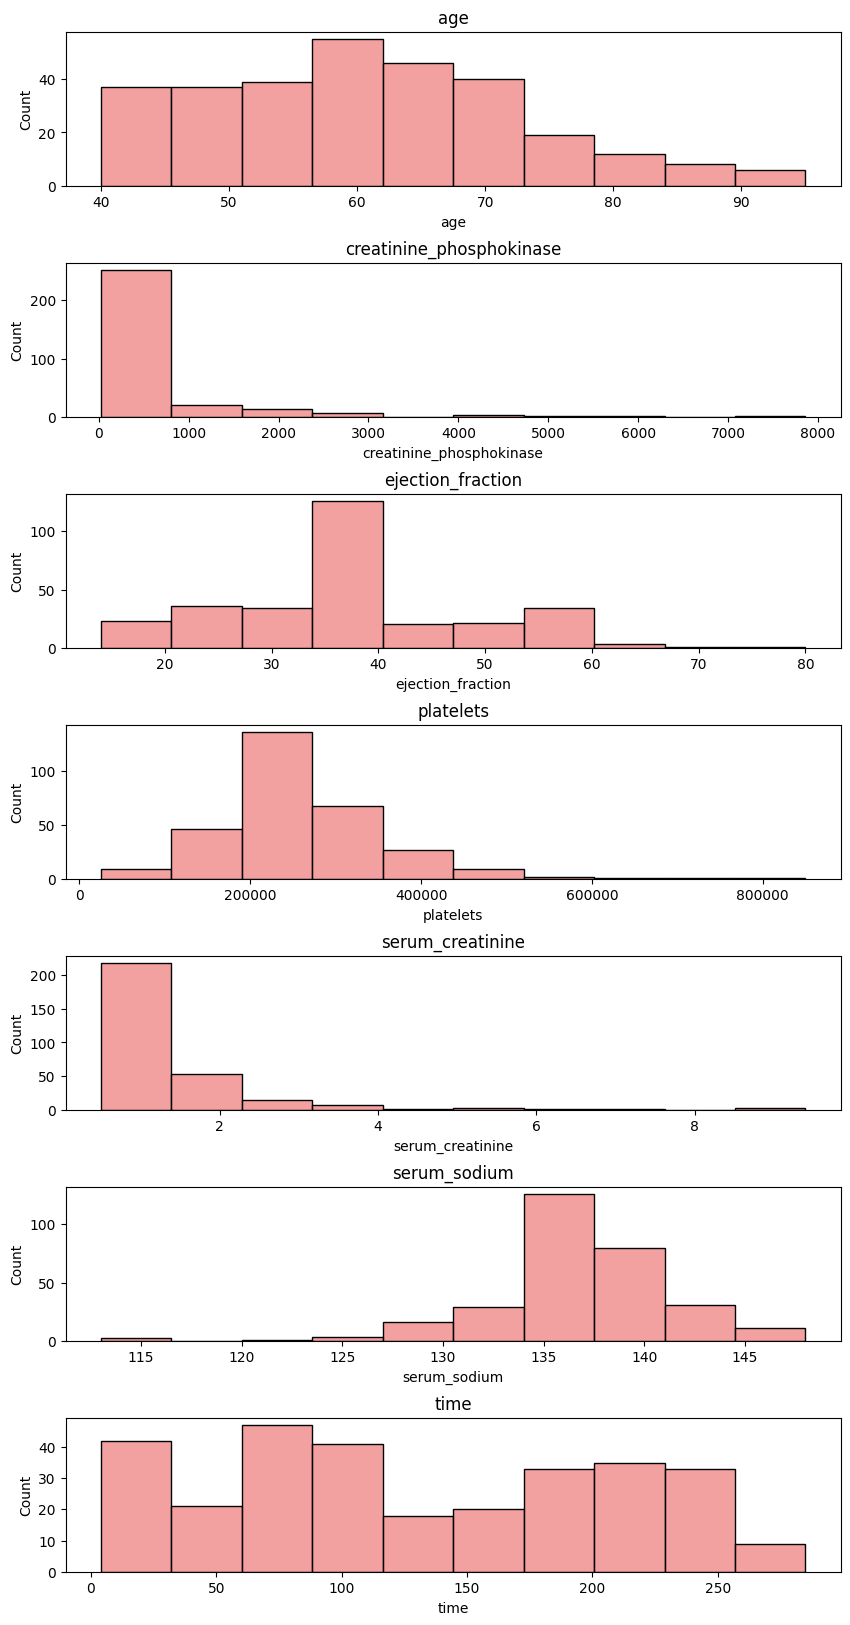

In [11]:
#Histogramas
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(10,20))
fig.subplots_adjust(hspace=0.5)

for i, columna in enumerate(variables_cuantitativas):
    sns.histplot(df[columna], bins=10, kde=False, ax=ax[i],color='lightcoral')
    ax[i].set_title(columna)

### **2.6.5 Diagramas de barras**
---
Para visualizar las variables binarias o categoricas

<ipython-input-12-01479c242acb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=df,ax=ax[i],palette='flare')
<ipython-input-12-01479c242acb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=df,ax=ax[i],palette='flare')
<ipython-input-12-01479c242acb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=df,ax=ax[i],palette='flare')
<ipython-input-12-01479c242acb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and s

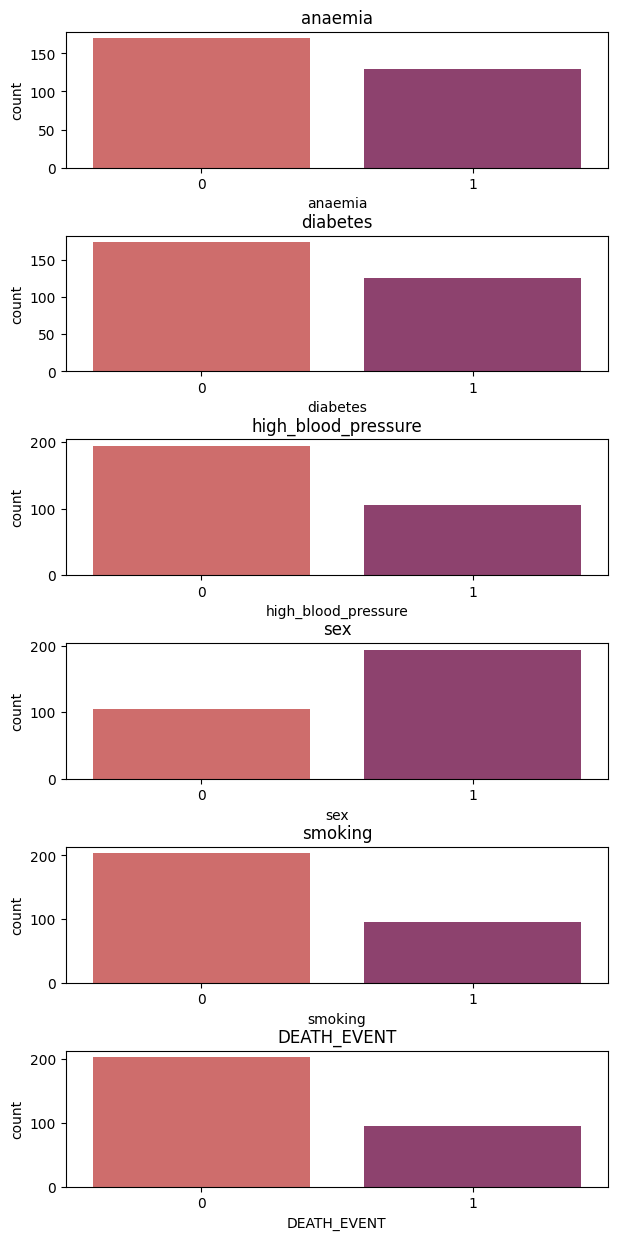

In [12]:
fig,ax=plt.subplots(nrows=len(variables_categoricas),ncols=1,figsize=(7,15))
fig.subplots_adjust(hspace=0.5)

for i,col in enumerate(variables_categoricas):
  sns.countplot(x=col,data=df,ax=ax[i],palette='flare')
  ax[i].set_title(col)

## **2.7 Medidas de dispersión**

In [13]:
#Media, valor minimo, valor maximo y desiación estandar
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [14]:
#Varianza
df[variables_cuantitativas].var()

age                         1.414865e+02
creatinine_phosphokinase    9.414586e+05
ejection_fraction           1.400635e+02
platelets                   9.565669e+09
serum_creatinine            1.070211e+00
serum_sodium                1.946996e+01
time                        6.023965e+03
dtype: float64

In [15]:
#Rango
df[variables_cuantitativas].max()-df[variables_cuantitativas].min()

age                             55.0
creatinine_phosphokinase      7838.0
ejection_fraction               66.0
platelets                   824900.0
serum_creatinine                 8.9
serum_sodium                    35.0
time                           281.0
dtype: float64

In [16]:
#Media de las variables agrupadas por sexo
df.groupby('sex').mean()[variables_cuantitativas]

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
sex,,,,,,,
0,59.777781,476.780952,40.466667,279964.021619,1.384095,136.790476,131.904762
1,61.405500,638.701031,36.793814,254370.249897,1.399175,136.536082,129.371134


In [17]:
#correlación
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [18]:
#covarianza
df[variables_cuantitativas].cov()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
age,141.486483,-9.415915e+02,8.460237,-6.090712e+04,1.958845,-2.412544,-206.861351
creatinine_phosphokinase,-941.591531,9.414586e+05,-506.174452,2.321533e+06,-16.470382,254.956443,-703.803618
ejection_fraction,8.460237,-5.061745e+02,140.063455,8.354524e+04,-0.138379,9.185787,38.330464
platelets,-60907.118586,2.321533e+06,83545.241001,9.565669e+09,-4168.399498,26810.436905,79811.066099
serum_creatinine,1.958845,-1.647038e+01,-0.138379,-4.168399e+03,1.070211,-0.863173,-11.988935
serum_sodium,-2.412544,2.549564e+02,9.185787,2.681044e+04,-0.863173,19.469956,30.014152
time,-206.861351,-7.038036e+02,38.330464,7.981107e+04,-11.988935,30.014152,6023.965276


<Axes: >

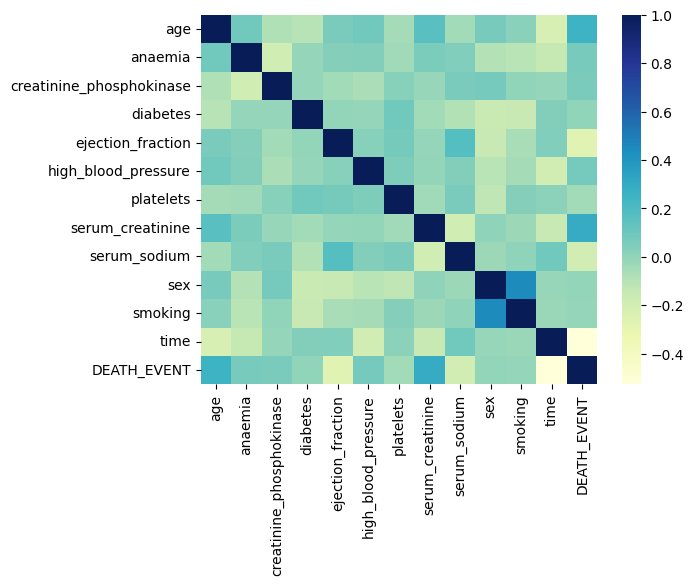

In [19]:
sns.heatmap(df.corr(),
            cmap='YlGnBu')

#### **2.7.1 Crosstabs para variables categoricas frente a DEATH_EVENT**

In [23]:
#Frente al sexo
pd.crosstab(df['DEATH_EVENT'],df['sex'],
            margins=True)

sex,0,1,All
DEATH_EVENT,,,
0,71,132,203
1,34,62,96
All,105,194,299


In [24]:
#Frente a la anemia
pd.crosstab(df['DEATH_EVENT'],df['anaemia'],
            margins=True)

anaemia,0,1,All
DEATH_EVENT,,,
0,120,83,203
1,50,46,96
All,170,129,299


In [25]:
#Frente a la diabetes
pd.crosstab(df['DEATH_EVENT'],df['diabetes'],
            margins=True)

diabetes,0,1,All
DEATH_EVENT,,,
0,118,85,203
1,56,40,96
All,174,125,299


In [26]:
#Frente a fumar
pd.crosstab(df['DEATH_EVENT'],df['smoking'],
            margins=True)

smoking,0,1,All
DEATH_EVENT,,,
0,137,66,203
1,66,30,96
All,203,96,299


In [27]:
#Frente a la alta presión sanguinea
pd.crosstab(df['DEATH_EVENT'],df['high_blood_pressure'],
            margins=True)

high_blood_pressure,0,1,All
DEATH_EVENT,,,
0,137,66,203
1,57,39,96
All,194,105,299


## **2.8 Resumen de la Calidad de los datos**
---

- ¿Se detecta la ausencia de datos, la presencia de datos erróneos o la existencia de datos de baja calidad en el conjunto?
- ¿Se identifican registros con datos ilegibles o con dificultades de codificación durante la revisión del conjunto de datos?
- ¿Se observa una diversidad de formatos en el conjunto de datos que pueda dificultar su consistencia o comprensión?
- ¿Se identificaron y abordaron posibles problemas, como valores atípicos, duplicados o datos faltantes?

Análisis del conjunto de datos

1. Ausencia, errores y baja calidad:

    Ausencia de datos: No se detecta la ausencia de datos en el conjunto.
    Errores en los datos: No se detectan datos erróneos durante la revisión.
    Baja calidad de los datos: No se observa la presencia de datos de baja calidad.

2. Ilegibilidad y dificultades de codificación:

    Ilegibilidad: No se identifican registros con datos ilegibles.
    Dificultades de codificación: No se encuentran dificultades de codificación durante la revisión.

3. Posibles problemas:

    Valores atípicos: Se identifican valores atípicos en el conjunto de datos. Conservamos estos valores ya que, en el sector médico, pueden proporcionar información fundamental sobre la patología.
    Valores duplicados: No se detectan valores duplicados durante la revisión.
    Datos faltantes: No se detectan datos faltantes en el conjunto de datos.


En general, el conjunto de datos se encuentra en buen estado. No se detectan ausencias de datos, errores o datos de baja calidad. Tampoco se encuentran registros ilegibles o con dificultades de codificación. Sin embargo, se observa una diversidad de formatos que podría dificultar su consistencia y comprensión. Se recomienda unificar los formatos y documentar el conjunto de datos para facilitar su análisis.

Nota: Es importante tener en cuenta que, al ser del sector médico, los valores atípicos se conservan ya que pueden proporcionar información fundamental sobre la patología.

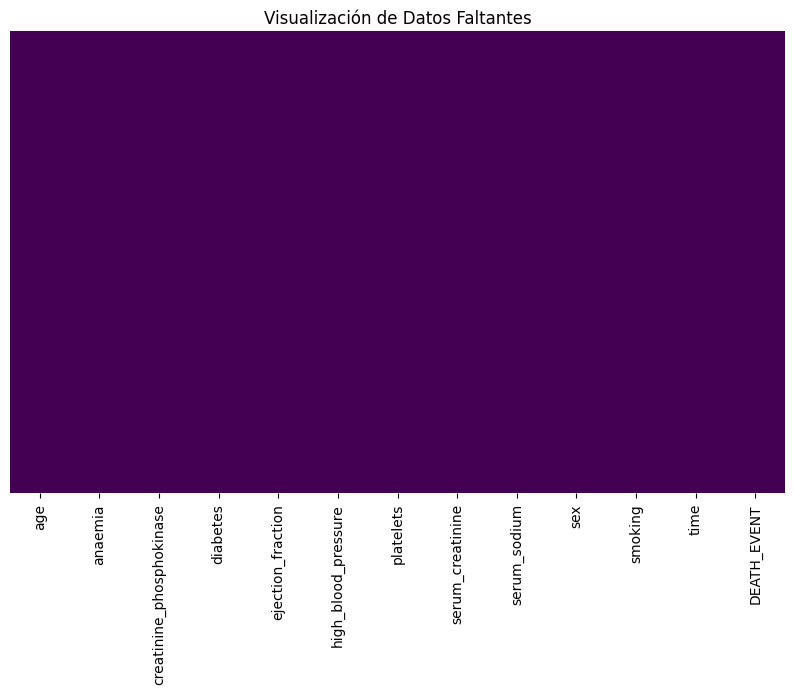

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Visualización de Datos Faltantes')
plt.show()

## **2.9. Tipos de variables**
---

- ¿El conjunto de datos tiene una variable objetivo a estimar?, de ser así, ¿es una variable continúa o categórica?
- Analice la distribución de las etiquetas, identifique si hay desbalanceo de datos.

- El conjunto de datos tiene cómo variable objetivo el evento de muerte, es una variable categórica que denota si el paciente falleció o no.

In [21]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

Por la naturaleza del dataset, y los objetivos del proyecto, hemos establecido que queremos estimar la variable DEATH_EVENT mediante las demas posibles variables con relación a ella.

Vemos que hay una distribución desbalanceada de etiquetas, donde los pacientes fallecidos son 96 , mientras los sobrevivientes son 203, lo que hace que el dataset no esté balanceado en tanto sus etiquetas, observemos la distribución de los datos y su correlación con esta variable para finalizar.

Text(0.5, 0.98, 'Marginal plot and distributions')

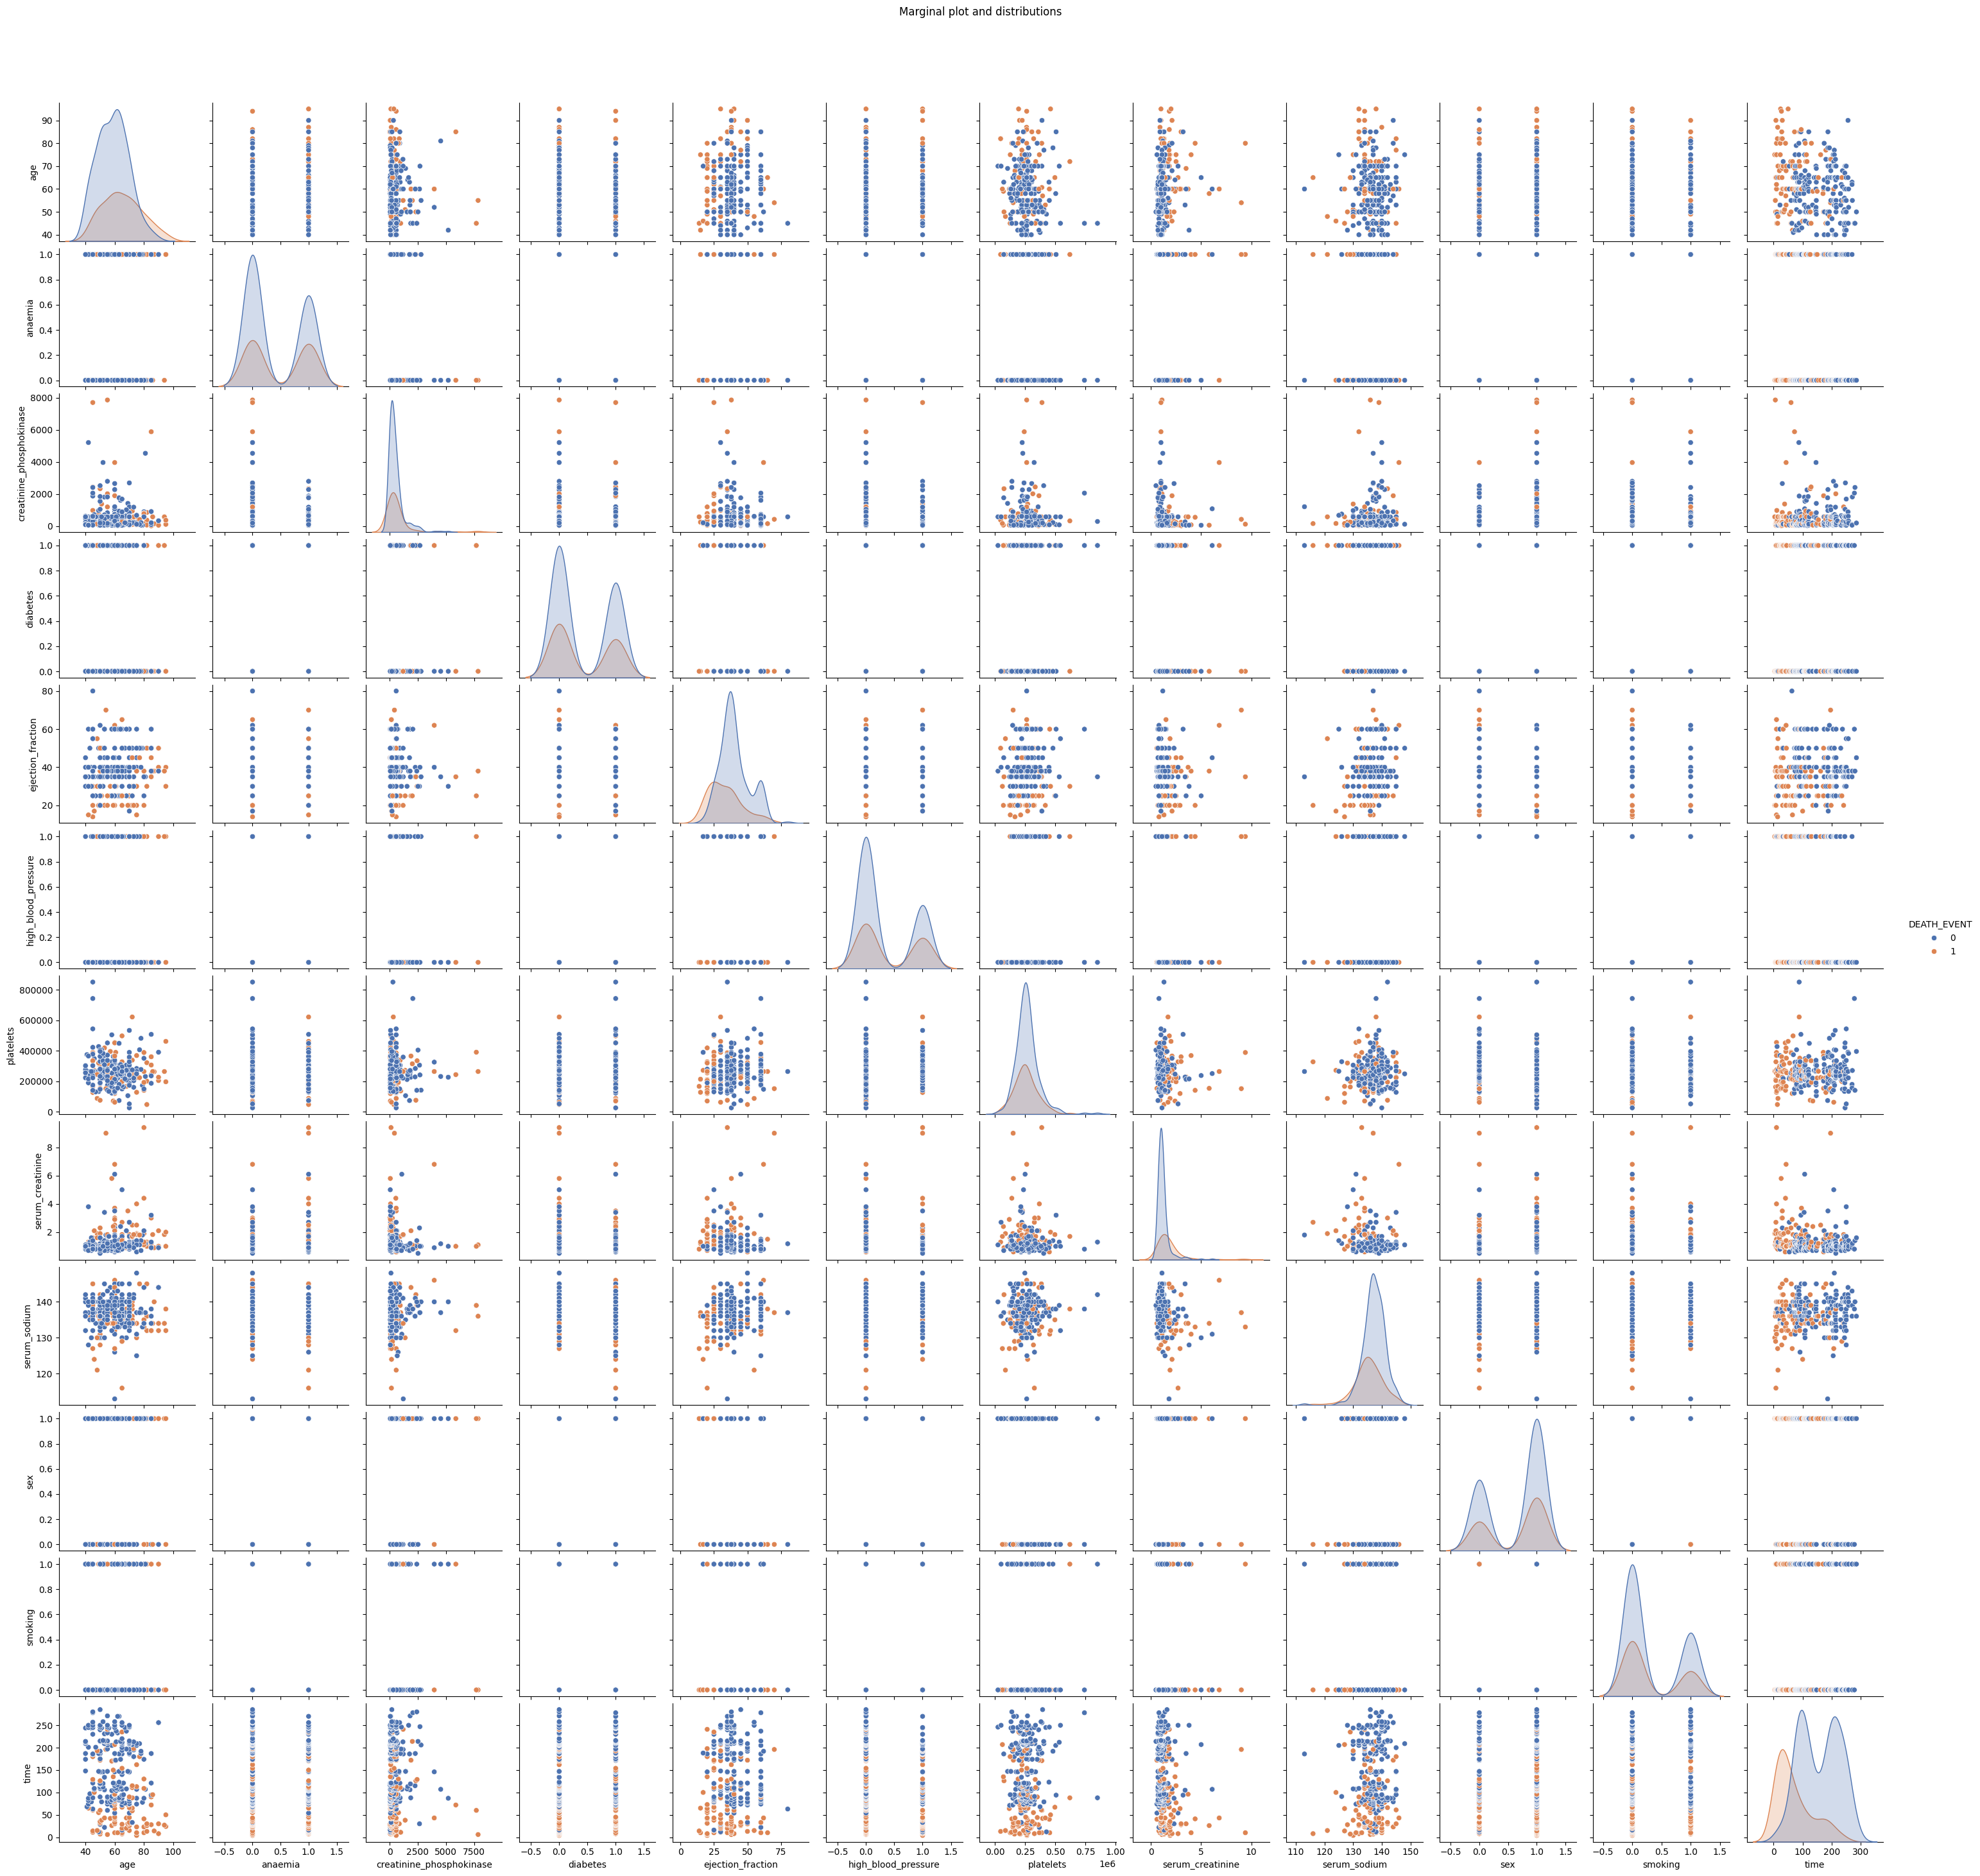

In [22]:
pair=sns.pairplot(df, hue="DEATH_EVENT",palette='deep')
pair.fig.subplots_adjust(top=.93)
pair.fig.suptitle('Marginal plot and distributions')

Podemos visualizar que las distribuciones en general no cumplen con condiciones de normalidad y que las correlaciones no parecen estar tan claras, aunque según nuestra matriz de correlación cosas cómo la edad o la creatinina guardan una alta correlación con el evento de morir.

# **3. Preparación de los datos**
---

### **3.1. Valores faltantes**
---
Al encontrarnos con valores faltantes en el conjunto de datos, es crucial preguntarse:
* ¿Cómo afectan estos valores a la integridad y representatividad de la información?

**No hay valores faltantes en el conjunto de datos, por lo que la integridad y representatividad de la información no se ven afectadas por la ausencia de valores.**

* ¿Cómo se identificaron los valores faltantes en el conjunto de datos?

**No se identificaron valores faltantes, ya que no existen en el conjunto de datos.**

* ¿Cuáles fueron los criterios para decidir si rellenar con valores estimados o eliminar los valores faltantes? En caso que aplique, ¿qué método de relleno se utilizó y por qué se consideró apropiado?

**Dado que no hay valores faltantes, no fue necesario tomar decisiones sobre rellenar o eliminar valores faltantes. No se aplicó ningún método de imputación o eliminación.**

* ¿Se realizó un análisis de la distribución de los valores faltantes en relación con las variables clave? Por ejemplo, si hay valores faltantes en una variable crítica, ¿cómo podría afectar la interpretación de los resultados?

**No se identificaron valores faltantes en ninguna variable del conjunto de datos. El mapa de calor muestra que todas las celdas están completas, lo que indica que no hay áreas con valores faltantes. Dado que no hay valores faltantes, no se realizó un análisis específico de la distribución de los valores faltantes en relación con variables clave. Por lo tanto, la interpretación de los resultados no se ve afectada por la ausencia de valores faltantes en ninguna variable crítica.**

Valores faltantes por variable:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


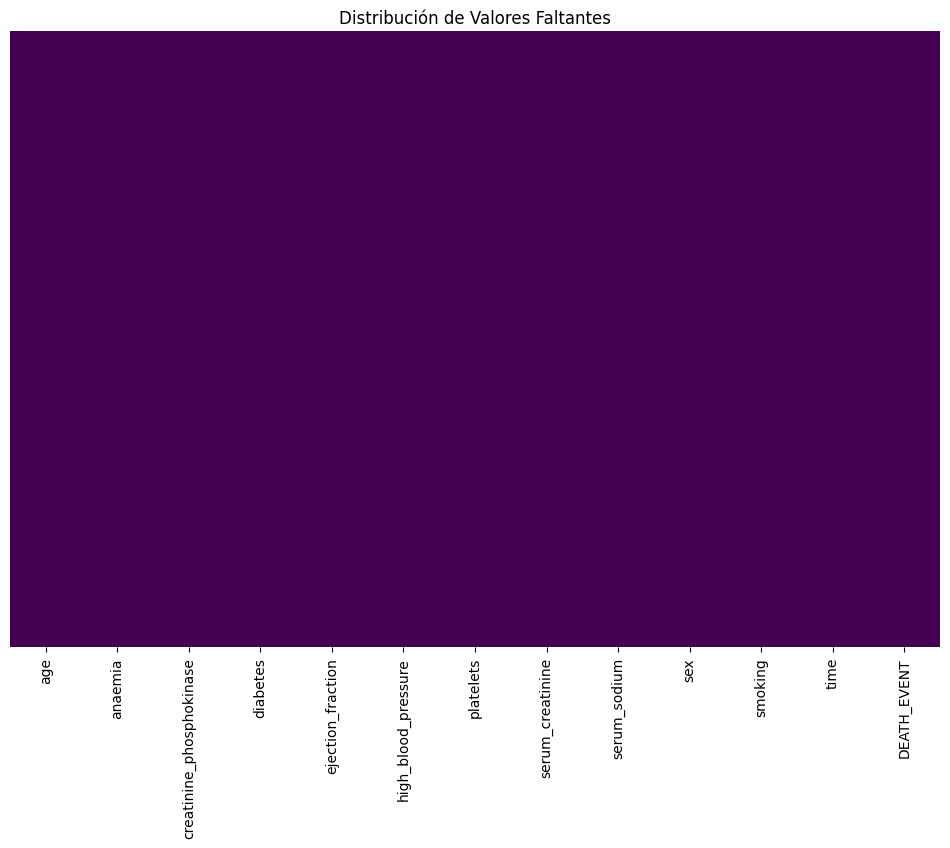

In [29]:
# Identificar valores faltantes
missing_values = df.isnull().sum()

# Imprimir la cantidad de valores faltantes por variable
print("Valores faltantes por variable:")
print(missing_values)

# Análisis de la distribución de valores faltantes
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Distribución de Valores Faltantes')
plt.show()


### **3.2. Valores duplicados**
----
Ante la presencia de valores duplicados, es esencial reflexionar sobre su impacto en los resultados.

* ¿Cómo se identificaron y manejaron los valores duplicados en el conjunto de datos?
* ¿Hubo alguna consideración especial al tratar duplicados en función de ciertas variables?
* ¿Pueden estos duplicados sesgar el análisis, y en qué medida?
* ¿Se justifica la eliminación de duplicados para mantener la coherencia y singularidad de los datos?
* ¿Cómo se aseguró de que la eliminación de duplicados no afectara negativamente la representación del conjunto de datos?

La identificación y eliminación de duplicados busca asegurar que cada registro aporte información única y valiosa.

In [30]:
# Identificar valores duplicados
duplicates = df[df.duplicated()]

# Imprimir la cantidad de valores duplicados
print("Cantidad de Valores Duplicados:", len(duplicates))

Cantidad de Valores Duplicados: 0


### **3.3. Valores atípicos**
---
Al abordar valores atípicos, es relevante cuestionarse sobre la naturaleza de estos puntos extremos.
* ¿Son errores de medición o representan información válida pero excepcional?
* ¿Qué criterios o técnicas se utilizaron para identificar los valores atípicos?
* ¿Se aplicaron métodos estadísticos o visuales para detectar los valores atípicos?
* ¿Cuál fue la decisión final sobre cómo tratar los valores atípicos y por qué?

La elección entre eliminar o transformar estos valores debe basarse en su influencia en la distribución y la interpretación de los resultados, asegurando que el análisis refleje de manera precisa la realidad del conjunto de datos.

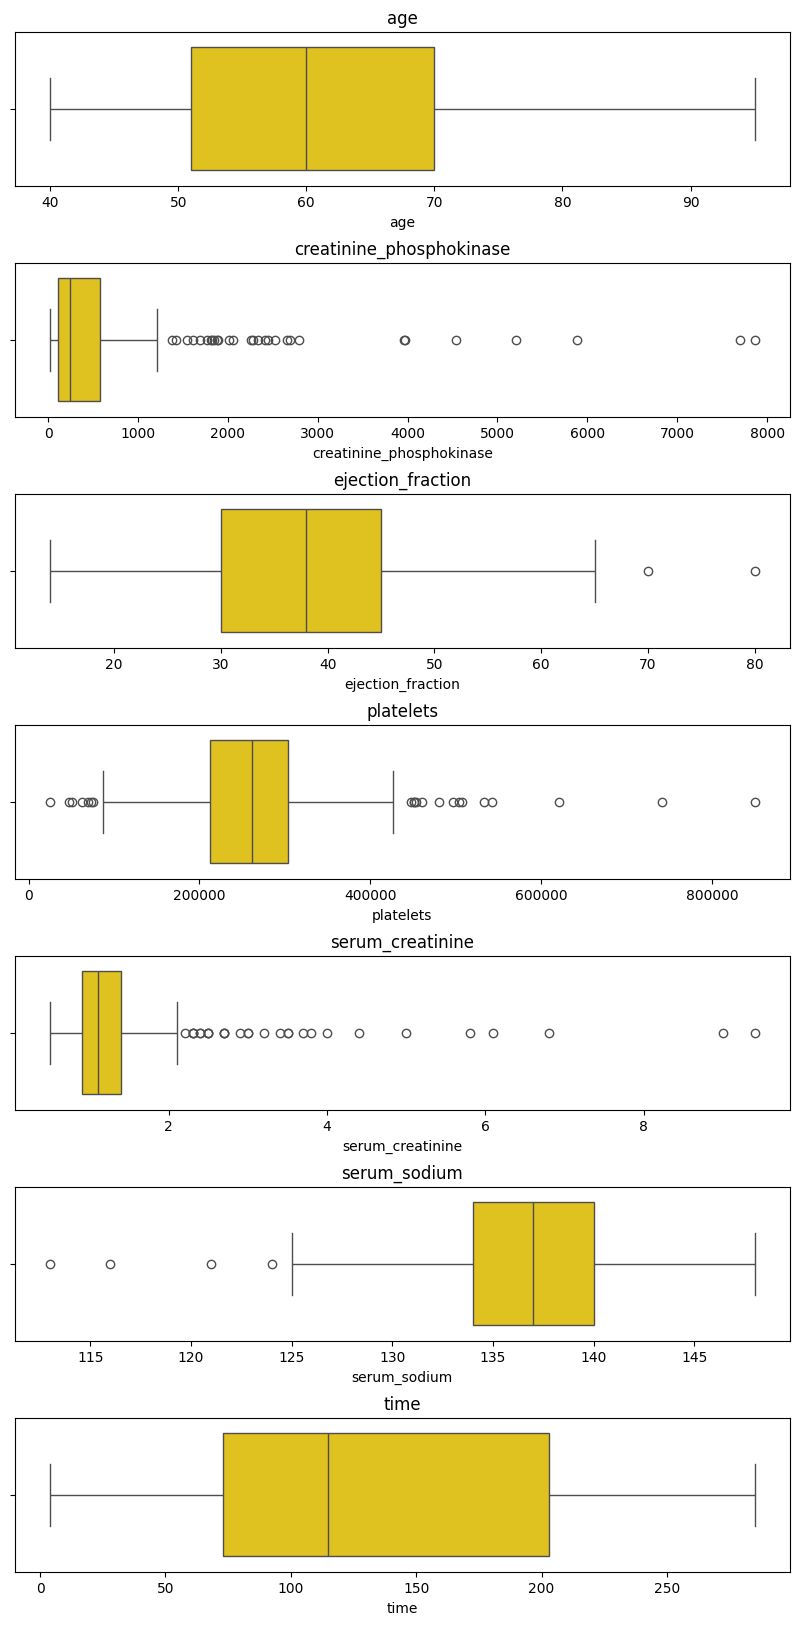

In [32]:
# Visualizar la distribución de variables numéricas mediante boxplots
#Boxplots para identificar outliers
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(10,20))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(variables_cuantitativas):
    sns.boxplot(x=col, data=df, ax=ax[i],color='gold')
    ax[i].set_title(col)

####**3.3.1 Posible metodología para filtrar valores atipicos (Suponiendo normalidad en los datos)**


Esta es la metodología que se quizo implementar en la fase 3 del proyecto, sin embargo se encontró más adelante que ninguna distribución era normal.

Adicionalmente se encontró en la literatura que las variables que más presentan valores atipicos (como los valores de creatinina, CPK o CK) se encontraban en un rango esperable. Del mismo modo se supuso que estos datos podrian ser información valiosa para el objetivo de predecir la variable DEATH_EVENT.

In [38]:
# Identificar valores atípicos en una variable específica (por ejemplo, 'creatinine_phosphokinase')
variable_atipica = 'creatinine_phosphokinase'

<ipython-input-39-6a8478a9f220>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[variable_atipica], palette='Blues')


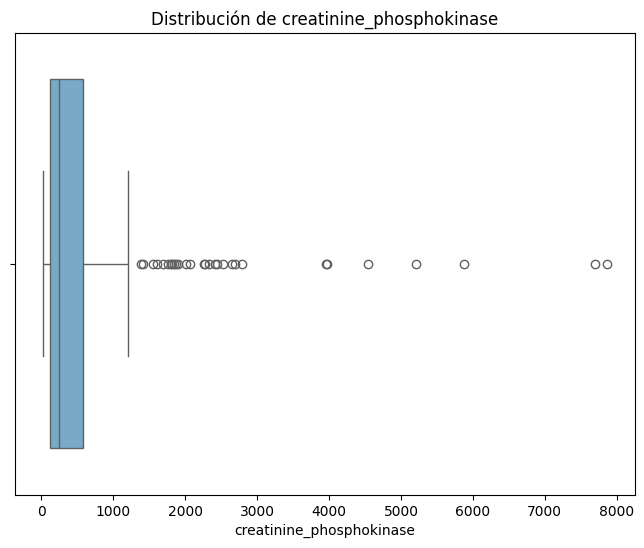

In [39]:
# Visualizar la distribución de la variable con un boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[variable_atipica], palette='Blues')
plt.title(f'Distribución de {variable_atipica}')
plt.show()

In [40]:
# Calcular los límites para identificar valores atípicos usando el rango intercuartílico (IQR)
Q1 = df[variable_atipica].quantile(0.25)
Q3 = df[variable_atipica].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [41]:
# Identificar y manejar valores atípicos
outliers = df[(df[variable_atipica] < lower_limit) | (df[variable_atipica] > upper_limit)]
df_no_outliers = df[(df[variable_atipica] >= lower_limit) & (df[variable_atipica] <= upper_limit)]

####**3.3.2 Normalidad de los datos (Vease la fase 4)**

In [43]:
v_normales=[]
v_no_normales=[]
for col in variables_cuantitativas:
  if stats.shapiro(df[col]).pvalue < 0.05:
    v_no_normales.append(col)
    print(f'NO. La variable {col} NO es normal con un pvalor de {stats.shapiro(df[col]).pvalue}')
  else:
    v_normales.append(col)
    print(f'SI. La variable {col} SI es normal con un pvalor de {stats.shapiro(df[col]).pvalue}')

NO. La variable age NO es normal con un pvalor de 5.3476593166124076e-05
NO. La variable creatinine_phosphokinase NO es normal con un pvalor de 7.05055700731454e-28
NO. La variable ejection_fraction NO es normal con un pvalor de 7.215172015406779e-09
NO. La variable platelets NO es normal con un pvalor de 2.8836867789483467e-12
NO. La variable serum_creatinine NO es normal con un pvalor de 5.3927583038658e-27
NO. La variable serum_sodium NO es normal con un pvalor de 9.220169072676754e-10
NO. La variable time NO es normal con un pvalor de 6.284944120693581e-09


### **3.4. Datos corruptos**
---
En la detección de datos corruptos, pregunte si hay posibles errores de entrada o problemas de transferencia que podrían haber afectado la integridad de los datos.
* ¿Cómo se determinó la presencia de datos corruptos en el conjunto de datos?
* ¿Qué medidas se tomaron para corregir o eliminar los datos corruptos?
* ¿Hubo casos en los que la corrupción de datos no pudo ser manejada y cómo se justificó esa decisión?

In [49]:
# Identificar datos corruptos (ejemplo: valores negativos en variables que no pueden ser negativas)
datos_corruptos = df[(df['platelets'] < 0) | (df['serum_creatinine'] < 0)]

In [ ]:
# Visualizar las distribuciones de variables con datos corruptos
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[['platelets', 'serum_creatinine']], palette='Set2')
plt.title('Distribución de Variables con Datos Corruptos')
plt.xticks(rotation=45)
plt.show()

In [50]:
# Mostrar la cantidad de registros con datos corruptos
print("Cantidad de Registros con Datos Corruptos:", len(datos_corruptos))

Cantidad de Registros con Datos Corruptos: 0


### **3.5. Selección de datos**
---
En la selección de datos, reflexione sobre las variables que son realmente relevantes para sus objetivos de análisis.
* ¿Qué criterios se utilizaron para seleccionar los datos relevantes para el análisis?
* ¿Se aplicaron técnicas de muestreo o filtrado para reducir el tamaño del conjunto de datos?
* ¿Cómo se justificó la inclusión o exclusión de ciertas variables en la selección de datos?

**El equipo llegó al resultado esperado desde el analisis exploratorio de datos, y es que el dataset esta en muy buenas condiciones. El dataset no presenta inconsistencias, no presenta datos faltantes, los valores atipicos se encuentran dentro de un rango normal de analisis y los datos no presentan datos corruptos. Es notable que el dataset tuvo un procesamiento previo antes de ser publicado**


**En conclusión, el dataset a implementar es practicamente el mismo que el que se encuentra en la fuente de datos.**

# **4. Análisis de los datos y resultados (desde aqui Robert, trata de indexar por la como 4.X para cada parte de esta fase)**
---

Al adentrarse en el análisis de datos, es crucial adoptar un enfoque estratégico que responda a las preguntas de planteadas en el proyecto. La selección de variables para estudio requiere una evaluación cuidadosa de los objetivos específicos del proyecto, priorizando aquellas que se consideren fundamentales para obtener resultados significativos.

A lo largo de esta entrega, trate busque responder las siguientes preguntas

- ¿Cómo se aplicaron conceptos específicos de estadística descriptiva e inferencial en el análisis de datos y cuál fue el enfoque utilizado para interpretar los resultados de manera precisa?
- ¿Cómo se interpretaron los resultados de la estadística descriptiva y qué conclusiones se pueden extraer?
- ¿Cómo se relacionan los resultados del análisis de datos con los objetivos y preguntas planteadas inicialmente?
- ¿Qué implicaciones prácticas tienen los hallazgos y cómo podrían influir en la toma de decisiones?

In [ ]:
df.sample(5)

### **1.1. Análisis de correlaciones**
---

- Analice la posible existencia de relaciones entre las variables, utilizando medidas de correlación o visualizaciones pertinentes.
- Detecte la presencia de redundancias entre las variables, con el objetivo de facilitar su posterior eliminación o selección en el análisis.
- ¿Cuáles fueron las variables seleccionadas para el análisis de correlaciones, y cómo se eligieron en función de los objetivos del proyecto?

In [33]:
#Pruebas de normalidad (para definir el coeficiente de correlación más adecuado)
v_normales=[]
v_no_normales=[]
for col in variables_cuantitativas:
  if stats.shapiro(df[col]).pvalue < 0.05:
    v_no_normales.append(col)
    print(f'La variable {col} NO es normal con un pvalor de {stats.shapiro(df[col]).pvalue}')
  else:
    v_normales.append(col)
    print(f'La variable {col} SI es normal con un pvalor de {stats.shapiro(df[col]).pvalue}')

La variable age NO es normal con un pvalor de 5.3476593166124076e-05
La variable creatinine_phosphokinase NO es normal con un pvalor de 7.05055700731454e-28
La variable ejection_fraction NO es normal con un pvalor de 7.215172015406779e-09
La variable platelets NO es normal con un pvalor de 2.8836867789483467e-12
La variable serum_creatinine NO es normal con un pvalor de 5.3927583038658e-27
La variable serum_sodium NO es normal con un pvalor de 9.220169072676754e-10
La variable time NO es normal con un pvalor de 6.284944120693581e-09


Como ninguna variable sigue una distribución normal, se recomienda implementar el coeficiente de correlación de Spearman $\rho$ entre estas variables

In [ ]:
#Variables cuantitativas relación
sns.pairplot(df)

In [ ]:
# Variables cuantitativas correlación
sns.heatmap(df[variables_cuantitativas].corr(method='spearman'),cmap='coolwarm',vmin=-1,vmax=1, annot=True,fmt='.4f')

**Correlación entre variables binarias y continuas (Punto biserial)**


In [35]:
from scipy.stats import pointbiserialr

In [36]:
#Encontrar correlaciones y pvalores
p_values=np.zeros([len(variables_categoricas),len(variables_cuantitativas)])
coef_corr_biserial=np.zeros([len(variables_categoricas),len(variables_cuantitativas)])
for i,col_cat in enumerate(variables_categoricas):
  for j,col_cuan in enumerate(variables_cuantitativas):
    coef_corr_biserial_num, p_value = pointbiserialr(df[col_cat], df[col_cuan])
    coef_corr_biserial[i][j]=coef_corr_biserial_num
    p_values[i][j]=p_value
df_pvalues=pd.DataFrame(p_values,index=variables_categoricas,columns=variables_cuantitativas)
correlaciones_biserial=pd.DataFrame(coef_corr_biserial,index=variables_categoricas,columns=variables_cuantitativas)

Text(0.5, 80.5815972222222, 'Variables Cuantitativas')

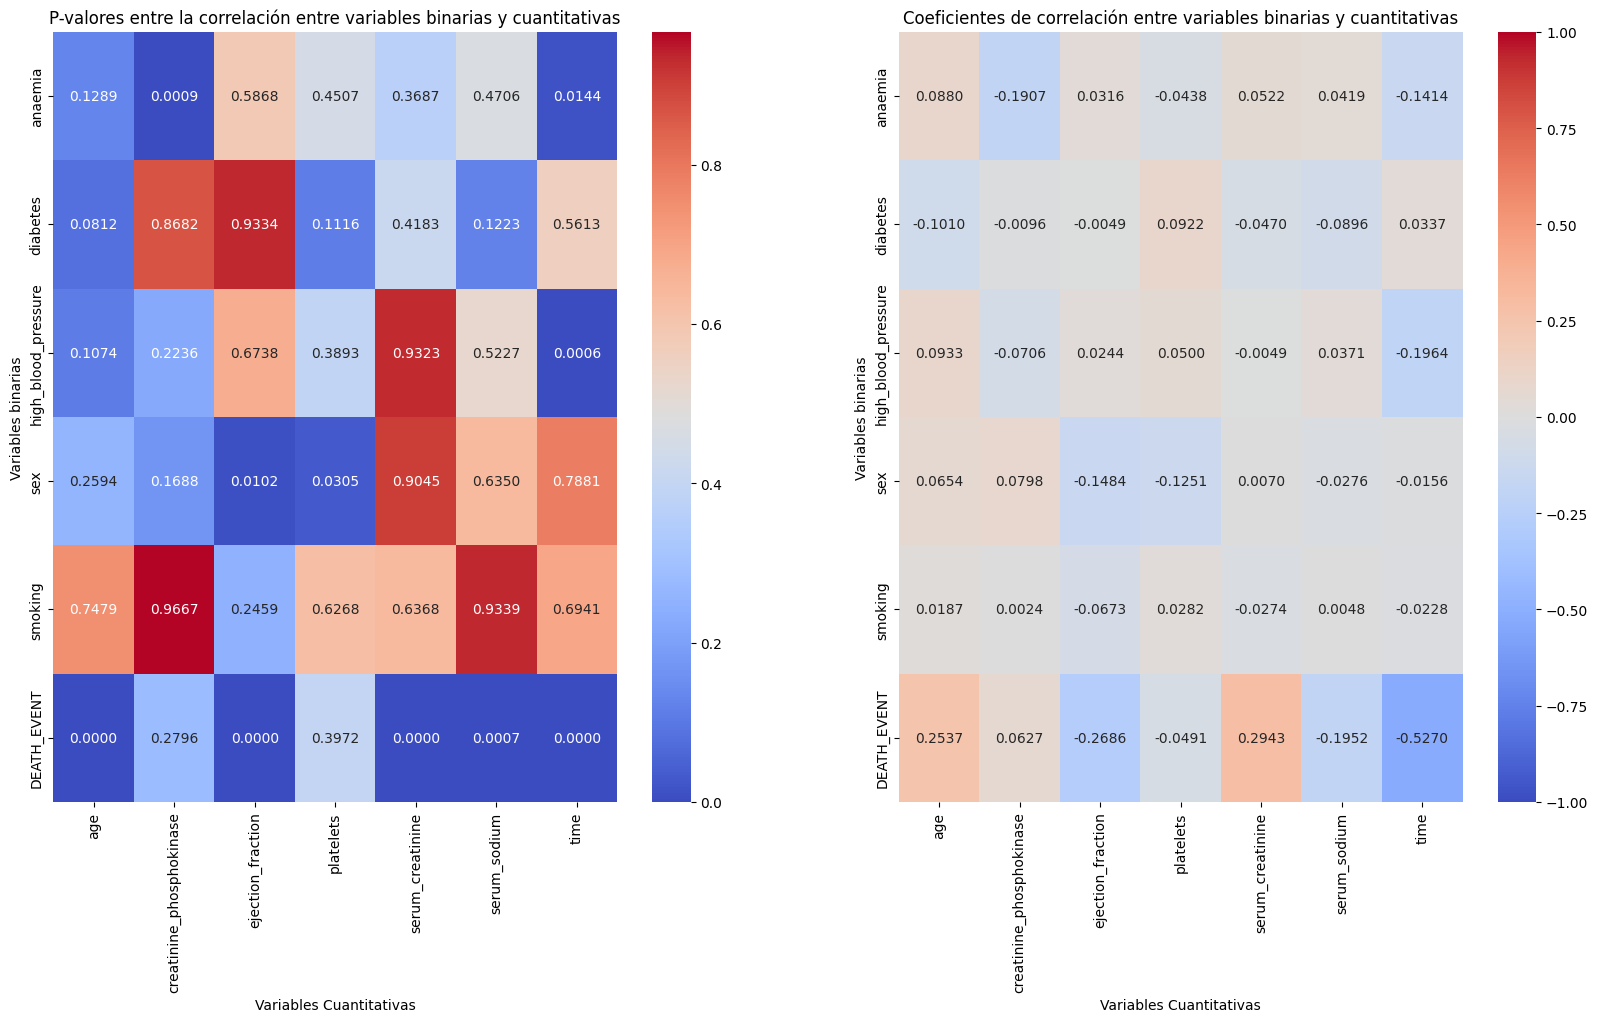

In [37]:
#Graficar correlaciones y pvalores
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,10))

sns.heatmap(df_pvalues,cmap='coolwarm',vmin=0, annot=True,fmt='.4f',ax=ax[0])
ax[0].set_title('P-valores entre la correlación entre variables binarias y cuantitativas')
ax[0].set_ylabel('Variables binarias')
ax[0].set_xlabel('Variables Cuantitativas')

sns.heatmap(correlaciones_biserial,cmap='coolwarm',vmin=-1,vmax=1, annot=True,fmt='.4f',ax=ax[1])
ax[1].set_title('Coeficientes de correlación entre variables binarias y cuantitativas')
ax[1].set_ylabel('Variables binarias')
ax[1].set_xlabel('Variables Cuantitativas')

***Aunque tenemos coeficientes de correlación muy bajos y poco evidentes en las graficas pairplot, sugiero que hagamos el modelo y tratemos de depurar los datos para serum_creatininte, age y ejection fraction (las cuales se estudiaban en el paper y que aqui muestran mejor correlación que las demas) Contra Death_event***

### **1.2. Análisis de regresiones**
---

- Apartir de las correlaciones identificadas, ¿es posible llevar a cabo un análisis de regresiones para estimar el valor de alguna de las variables de interés?
- ¿Cuáles fueron las variables seleccionadas para el análisis de regresiones y cómo se eligieron en función de los objetivos del proyecto?

In [ ]:
model = sm.GLM.from_formula("DEATH_EVENT ~ ejection_fraction + serum_creatinine + age", family=sm.families.Binomial(), data=df)
result = model.fit()
result.summary()

## **¿El modelo genera una buena predicción?**
---

Los resultados de la visualización del punto anterior nos indican que, en algunos casos, el modelo es bastante acertado para clasificar flores de alguna de las dos especies. Vamos a evaluar la **exactitud (*accuracy*)** del modelo de regresión logística. Esta es una métrica de desempeño típica que se utiliza para evaluar los clasificadores. Se calcula de la siguiente manera:

$$Accuracy = \frac{número\ de\ aciertos}{total}$$

In [ ]:
#Aplicación del modelo en los datos
dfc=df.copy()
Intercept,x1,x2,x3=result.params
dfc['Prediction_model']=1/(1+np.exp(-(Intercept + dfc['ejection_fraction']*x1 + dfc['serum_creatinine']*x2 + dfc['age']*x3)))
dfc['Prediction_result']=dfc['Prediction_model'].apply(lambda x: 0.0 if x<=0.5 else 1.0)
#Aciertos del modelo
dfc['Acierto_modelo']= dfc['DEATH_EVENT'] == dfc['Prediction_result']
#Stats
porcentaje_acierto=dfc['Acierto_modelo'].sum()*100/len(dfc['Acierto_modelo'])
total=dfc['Acierto_modelo'].sum()
print(f'La exactitud del modelo en el dataset es de {porcentaje_acierto}%\nCon un total de {total} aciertos de 299')

## **2. Resultados y visualizaciones**

### **2.1. Visualizaciones Estáticas**
---

* Incluya gráficos y visualizaciones estáticas que sean relevantes para los datos analizados.
* Explique cada visualización y cómo contribuye a la comprensión de los resultados.

In [ ]:
# 1. Histograma de la distribución de la edad de los pacientes
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Distribución de la Edad de los Pacientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# 2. Gráfico de barras para contar la cantidad de pacientes con y sin diabetes
plt.figure(figsize=(8, 6))
sns.countplot(x='diabetes', data=df, palette='Set2')
plt.title('Cantidad de Pacientes con y sin Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Cantidad de Pacientes')
plt.xticks(ticks=[0, 1], labels=['Sin Diabetes', 'Con Diabetes'])
plt.show()

In [ ]:
# 3. Gráfico de dispersión para mostrar la relación entre la edad y el nivel de creatinina sérica
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='serum_creatinine', data=df, color='green')
plt.title('Relación entre Edad y Nivel de Creatinina Sérica')
plt.xlabel('Edad')
plt.ylabel('Nivel de Creatinina Sérica')
plt.grid(True)
plt.show()

### **2.2. Visualizaciones Interactivas**
---

* Cree visualizaciones interactivas, como gráficos dinámicos o tableros interactivos y proporcione instrucciones claras sobre cómo interactuar con ellos.
* Explore cómo estas visualizaciones ayudan en la exploración de datos y documente su análisis.

### **2.3. Visualización de Mapas Coropléticos (Opcional)**
---

* Si aplica mapas coropléticos para representar datos geoespaciales, incluya estas visualizaciones.
* Explique la elección de este tipo de visualización y cómo ésta contribuye a la comprensión de patrones geográficos y a la solución planteada.

### **2.4. Interpretación de Resultados**
---
* ¿Existen patrones o tendencias significativas en los datos?

Sí, los gráficos y las pruebas estadísticas revelan relaciones y asociaciones entre las variables cuantitativas, así como distribuciones de frecuencia para variables categóricas, lo que sugiere la presencia de patrones o tendencias en los datos.

* ¿Qué significan los resultados en términos prácticos?

Los resultados proporcionan información sobre la naturaleza de las relaciones entre las variables y la distribución de los datos, lo que puede ayudar a tomar decisiones informadas en función de la comprensión de los patrones en los datos.

* ¿Existen patrones o tendencias inesperadas en los datos que requieran una consideración especial o una investigación adicional?

Se debe prestar atención a las variables que no siguen una distribución normal y a las correlaciones significativas entre variables, ya que pueden indicar áreas de interés que requieren una investigación adicional para comprender mejor su naturaleza y sus implicaciones.

* ¿Cuáles fueron los hallazgos principales que contribuirán al proceso de toma de decisiones?

Los hallazgos principales incluyen las relaciones identificadas entre variables, la presencia de variables no normales y las tendencias observadas en la distribución de las variables. Estos hallazgos pueden proporcionar información valiosa para la toma de decisiones en función de la comprensión de los patrones y asociaciones en los datos.

Recuerde que la interpretación de resultados es una fase clave para extraer el significado de los datos y proporcionar respuestas o soluciones al problema inicial.

## **3. Conclusiones**
---
Asegúrese de incluir al menos una conclusión de cada unidad tratada en los *notebooks*. Estas conclusiones actúan como resúmenes breves que destacan los puntos clave y los aprendizajes esenciales de cada sección.


1.   
2.   
3.   
4.   En conclusión, el análisis estadístico realizado proporciona una comprensión profunda de los datos y revela varias tendencias y relaciones importantes entre las variables. Se identificaron variables que no siguen una distribución normal y se exploraron las asociaciones entre variables cuantitativas y binarias. Además, se observaron patrones en la distribución de la edad de los pacientes y en la prevalencia de la diabetes en la muestra.

